In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from scipy import stats

from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split,StratifiedKFold,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


In [4]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [5]:
df = pd.read_csv("Training Data.csv")
df_test = pd.read_csv("Test Data.csv")
df_test_original = df_test

In [6]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [466]:
# df['new'] = df['experience'] +df['current_job_years']

In [7]:
df['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [8]:
Y = df['risk_flag'].values

In [9]:
df=df.drop(['state','city','profession','Id','risk_flag'],axis=1)

In [470]:
df = pd.get_dummies(df,columns=['house_ownership','car_ownership','married'])
# df['car_ownership'].replace({'yes':1,'no':0},inplace=True)
# df['married'].replace({'married':1,'single':0},inplace=True)

In [471]:
X = df.iloc[:,:].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)



In [356]:
def get_optimal_thresh(target, probs):
  thresholds = np.arange(0, 100)/1000
  thresh_scores = []
  for thresh in thresholds:
    probs_rounded = (probs > thresh) * 1
    thresh_score = roc_auc_score(target, probs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('roc_auc Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

def get_normal(X_train,y_train,X_test,y_test,classifier):


    
    sc = StandardScaler()
    
    
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    print("roc_auc_score: {:.5f} %".format(score))
    return y_test,y_pred

In [472]:
classifier = RandomForestClassifier(verbose=200,n_jobs=-1,n_estimators=100)


In [482]:
y_test,y_pred =get_normal(X_train,y_train,X_test,y_test,classifier)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s

building tree 6 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s

building tree 7 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.4s

building tree 8 of 100[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s

building tree 9 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.7s

building tree 12 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s

building tree 13 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s

building tree 14 of 100[Parallel(n_jobs=-1)]: Done  10 tas

[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    8.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs

In [486]:
score = roc_auc_score(y_test,(y_pred >0.013)*1)
print("roc_auc_score: {:.9f} %".format(score))

roc_auc_score: 0.892409807 %


0.013

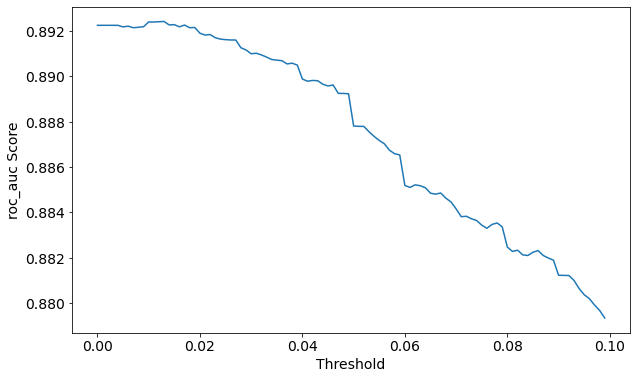

In [484]:
get_optimal_thresh(y_test,y_pred)